# Rodríguez-Pérez, Q. et.al.2018(SRL-Under-Review) DataBase Comparasions

In [1]:
ENV["LINES"]=1000

1000

In [1]:
using DataFrames
using GLM
using Plots
using CSV

In [2]:
using LaTeXStrings

In [3]:
pyplot()

Plots.PyPlotBackend()

In [8]:
DataGolfo = CSV.read("BMPF-14junio2017GolfoNEW.csv");
DataSUB = CSV.read("BMPF-14junio2017SUBNEW.csv");
DataTMVB = CSV.read("BMPF-14junio2017TMVBNEW.csv");

In [9]:
#DataTo[:Magnitud]=round.(dropna(DataTo[:Magnitud]),1);
DataGolfo[:Mw]=round.(collect(skipmissing(DataGolfo[:Mw])),1);
DataSUB[:Mw_]=round.(collect(skipmissing(DataSUB[:Mw])),1);
DataTMVB[:Mw]=round.(collect(skipmissing(DataTMVB[:Mw])),1);

In [12]:
DataTMVB

,Event,Date_dd/mm/aa,Time_hh:mm:ss,Lon,Lat,Depth_km,Mw,Mo_Nm,Stress_Drop_MPa,Fc_Hz,Radius_km,Displacement_m,Er_J,Er_Mo,Strike,Dip,Rake,Place,None,Quality1,Quality2,Drop_Sd,Raduis_Sd,Fc_Sd,Er_Sd
1,2,12/07/74,02:41:52.50,-99.2,19.21,7.0,3.8,5.34e14,53.3,5.47,0.16,0.2212,missing,missing,missing,missing,missing,TMVB,missing,Fair,B,missing,missing,missing,missing
2,3,25/03/76,23:05:00.50,-99.33,20.4807,4.0,5.0,4.5e16,0.7,0.4,3.0,0.0531,missing,missing,242,64,-174,TMVB,missing,Good,B,missing,missing,missing,missing
3,4,04/10/76,06:59:16.41,-99.1458,20.4927,4.0,5.1,5.6e16,0.7,0.45,3.0,0.066,missing,missing,291,76,-25,TMVB,missing,Good,B,missing,missing,missing,missing
4,42,22/02/79,09:16:33,-100.176,19.8936,8.19,5.5,1.75e17,8.236,0.635,2.02,0.4551,missing,missing,280,66,-48,TMVB,T,Good,B,2.6,0.33941,0.10607,missing
5,43,22/02/79,10:38:00,-100.191,19.9166,8.53,3.6,2.69e14,0.56,1.96,0.701,0.0058,missing,missing,missing,missing,missing,TMVB,T,Good,B,0.57,0.16,0.78,missing
6,44,22/02/79,09:57:00,-100.202,19.8738,4.96,3.4,1.38e14,0.06,1.26,1.005,0.0014,missing,missing,missing,missing,missing,TMVB,T,Fair,B,missing,missing,missing,missing
7,45,22/02/79,10:26:00,-100.177,19.8531,7.86,3.1,4.9e13,0.116,2.21,0.62,0.0014,missing,missing,missing,missing,missing,TMVB,T,Good,B,0.087681,0.24,0.86267,missing
8,46,22/02/79,10:28:00,-100.135,19.8287,3.32,3.3,7.9e13,0.518,2.5,0.79,0.0013,missing,missing,missing,missing,missing,TMVB,T,Good,B,0.70661,0.67175,2.1213,missing
9,47,22/02/79,12:15:00,-100.147,19.8853,9.72,3.3,9.02e13,0.613,3.16,0.4,0.006,missing,missing,missing,missing,missing,TMVB,T,Good,B,missing,missing,missing,missing
10,48,22/02/79,19:45:00,-100.171,19.8352,4.96,3.9,7.95e14,0.405,1.17,1.12,0.0067,missing,missing,missing,missing,missing,TMVB,T,Good,B,0.38857,0.25796,0.31213,missing


In [10]:
sub1 = "MSZ"
golf = "GBC"
TM = "TMVB";

In [13]:
#SUB1 = DataSUB[.~isna.(DataSUB[:Caida_de_esfuerzos]),:]; # Remove Stress Drop -->> NA
SUB1=DataSUB[find(.~ismissing.(DataSUB[:,:Stress_Drop_MPa])), :];

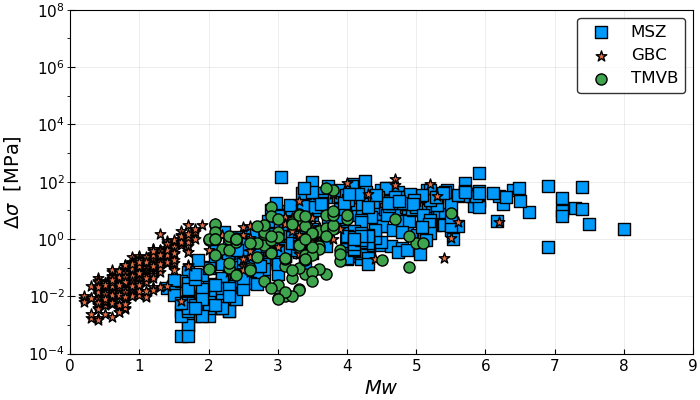

In [14]:
scatter((SUB1[:Mw]),(SUB1[:Stress_Drop_MPa]),lab=sub1, m=(8,:rect))
scatter!((DataGolfo[:Mw]),(DataGolfo[:Stress_Drop_MPa]),lab=golf,m=(8,:star5))
scatter!((DataTMVB[:Mw]),(DataTMVB[:Stress_Drop_MPa]),lab=TM,m=(8,:circle),
    xlabel=L"$Mw$", ylabel=L"$\Delta \sigma$  [MPa]",xlims=(0,9),xticks=(0:1:9),ylims=(10e-5,10e7),size=(700,400),box=:True,
legendfont=Plots.font("Helvetica",12),
xtickfont=Plots.font("Helvetica",11),
ytickfont=Plots.font("Helvetica",11),
guidefont=Plots.font("Helvetica",14))
yaxis!(:log10)
#PyPlot.savefig("MwvsStress.png",dpi=400,format="png")

In [15]:
#SUB2 = SUB1[.~isna.(SUB1[:freq_esc_]),:]; # Remove Stress Drop and Fc -->> NA
#TMVB1 = DataTMVB[.~isna.(DataTMVB[:freq_esc_]),:]; # # Remove Fc -->> NA
SUB2=SUB1[find(.~ismissing.(SUB1[:,:Fc_Hz])), :];
TMVB1=DataTMVB[find(.~ismissing.(DataTMVB[:,:Fc_Hz])), :];

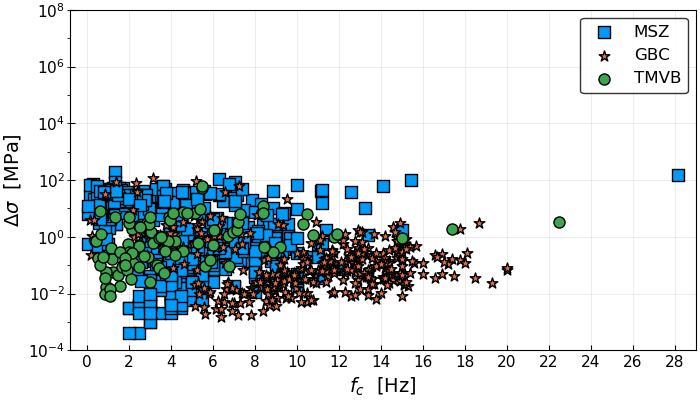

In [17]:
scatter((SUB2[:Fc_Hz]),(SUB2[:Stress_Drop_MPa]),yscale=:log10,lab=sub1, m=(8,:rect))
scatter!((DataGolfo[:Fc_Hz]),(DataGolfo[:Stress_Drop_MPa]),yscale=:log10,lab=golf,m=(8,:star5))
scatter!((TMVB1[:Fc_Hz]),(TMVB1[:Stress_Drop_MPa]),yscale=:log10,lab=TM,m=(8,:circle),
    xlabel=L"$f_{c}$  [Hz]", ylabel=L"$\Delta \sigma$  [MPa]",xticks=(0:2:30),ylims=(10e-5,10e7),size=(700,400),box=:True,
legendfont=Plots.font("Helvetica",12),
xtickfont=Plots.font("Helvetica",11),
ytickfont=Plots.font("Helvetica",11),
guidefont=Plots.font("Helvetica",14))
#PyPlot.savefig("FCvsStress.png",dpi=400,format="png")

In [18]:
#SUB3 = DataSUB[.~isna.(DataSUB[:Prof]),:]; # Remove Depth -->> NA
#Golfo1 = DataGolfo[.~isna.(DataGolfo[:Prof]),:];# Remove Depth -->> NA
SUB3=DataSUB[find(.~ismissing.(DataSUB[:,:Depth_km])), :];
Golfo1=DataGolfo[find(.~ismissing.(DataGolfo[:,:Depth_km])), :];

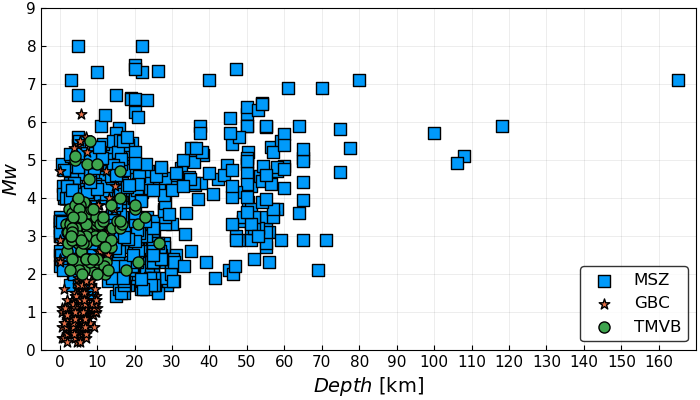

In [19]:
scatter((SUB3[:Depth_km]),(SUB3[:Mw]),lab=sub1, m=(8,:rect))
scatter!((Golfo1[:Depth_km]),(Golfo1[:Mw]),lab=golf,m=(8,:star5))
scatter!((DataTMVB[:Depth_km]),(DataTMVB[:Mw]),lab=TM,m=(8,:circle),
    ylabel=L"$Mw$", xlabel=L"$Depth$ [km]",xticks=(0:10:180),ylims=(0,9),yticks=(0:1:9),size=(700,400),box=:True,
legendfont=Plots.font("Helvetica",12),
xtickfont=Plots.font("Helvetica",11),
ytickfont=Plots.font("Helvetica",11),
guidefont=Plots.font("Helvetica",14))
#PyPlot.savefig("DepthvsMw.pdf",dpi=400)

In [23]:
#SUB4 = SUB1[.~isna.(SUB1[:Prof]),:]; # Remove Stress Drop and Depth -->> NA
SUB4=SUB1[find(.~ismissing.(SUB1[:,:Depth_km])), :];

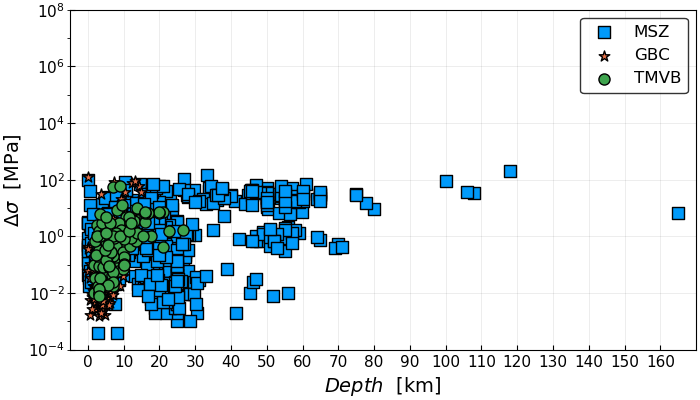

In [24]:
scatter((SUB4[:Depth_km]),(SUB4[:Stress_Drop_MPa]),yscale=:log10,lab=sub1, m=(8,:rect))
scatter!((Golfo1[:Depth_km]),(Golfo1[:Stress_Drop_MPa]),yscale=:log10,lab=golf,m=(8,:star5))
scatter!((DataTMVB[:Depth_km]),(DataTMVB[:Stress_Drop_MPa]),yscale=:log10,lab=TM,m=(8,:circle),
    xlabel=L"$Depth$  [km]", ylabel=L"$\Delta \sigma$  [MPa]",xticks=(0:10:180),ylims=(10e-5,10e7),size=(700,400),box=:True,
legendfont=Plots.font("Helvetica",12),
xtickfont=Plots.font("Helvetica",11),
ytickfont=Plots.font("Helvetica",11),
guidefont=Plots.font("Helvetica",14))
#PyPlot.savefig("DepthvsStress.png",dpi=400, format="png")

In [25]:
#SUB5 = SUB3[.~isna.(SUB3[:Fo]),:]; # Remove Depth and Fc --->> NA
SUB5=SUB3[find(.~ismissing.(SUB3[:,:Fc_Hz])), :];

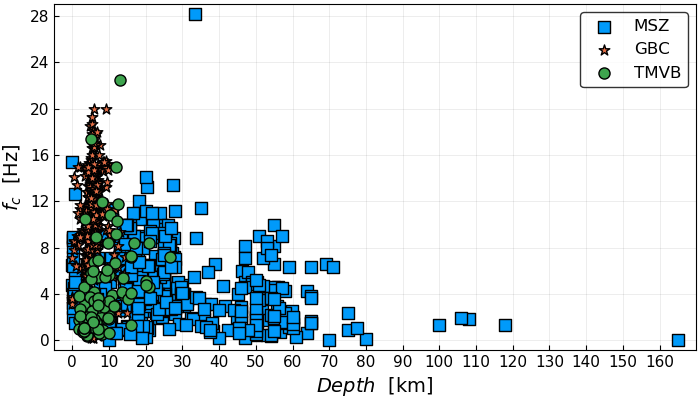

In [27]:
scatter((SUB5[:Depth_km]),(SUB5[:Fc_Hz]),lab=sub1, m=(8,:rect))
scatter!((Golfo1[:Depth_km]),(Golfo1[:Fc_Hz]),lab=golf,m=(8,:star5))
scatter!((TMVB1[:Depth_km]),(TMVB1[:Fc_Hz]),lab=TM,m=(8,:circle),
    xlabel=L"$Depth$  [km]", ylabel=L"$f_{c}$  [Hz]",xticks=(0:10:180),yticks=(0:4:30),size=(700,400),box=:True,
legendfont=Plots.font("Helvetica",12),
xtickfont=Plots.font("Helvetica",11),
ytickfont=Plots.font("Helvetica",11),
guidefont=Plots.font("Helvetica",14),)
#PyPlot.savefig("DepthvsFC.pdf",dpi=400)

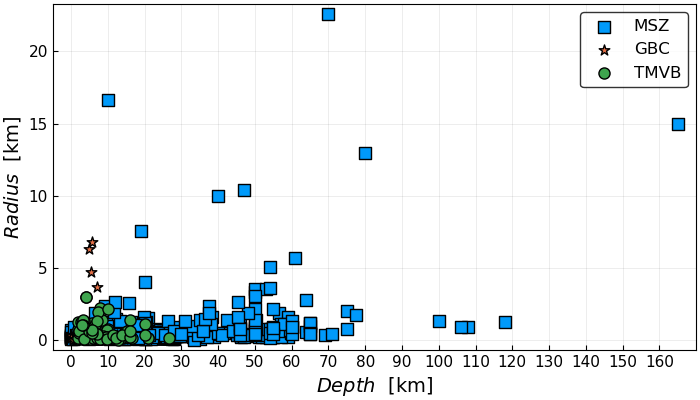

In [30]:
scatter((SUB5[:Depth_km]),(SUB5[:Radius_km]),lab=sub1, m=(8,:rect))
scatter!((Golfo1[:Depth_km]),(Golfo1[:Radius_km]),lab=golf,m=(8,:star5))
scatter!((TMVB1[:Depth_km]),(TMVB1[:Radius_km]),lab=TM,m=(8,:circle),
    xlabel=L"$Depth$  [km]", ylabel=L"$Radius$  [km]",xticks=(0:10:180),size=(700,400),box=:True,
legendfont=Plots.font("Helvetica",12),
xtickfont=Plots.font("Helvetica",11),
ytickfont=Plots.font("Helvetica",11),
guidefont=Plots.font("Helvetica",14))
#PyPlot.savefig("DepthvsRadius.pdf",dpi=400)

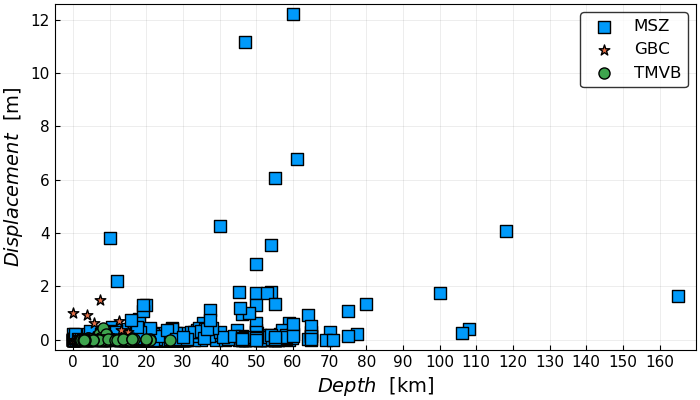

In [32]:
scatter((SUB5[:Depth_km]),(SUB5[:Displacement_m]),lab=sub1, m=(8,:rect))
scatter!((Golfo1[:Depth_km]),(Golfo1[:Displacement_m]),lab=golf,m=(8,:star5))
scatter!((TMVB1[:Depth_km]),(TMVB1[:Displacement_m]),lab=TM,m=(8,:circle),
    xlabel=L"$Depth$  [km]", ylabel=L"$Displacement$  [m]",xticks=(0:10:180),size=(700,400),box=:True,
legendfont=Plots.font("Helvetica",12),
xtickfont=Plots.font("Helvetica",11),
ytickfont=Plots.font("Helvetica",11),
guidefont=Plots.font("Helvetica",14))
#PyPlot.savefig("DepthvsDispla.pdf",dpi=400)

In [33]:
# Er_Mo Figure
SUBErMo=DataSUB[find(.~ismissing.(DataSUB[:,:Er_Mo])), :];# Remove Er_Mo -->> NA
TMVErMo=DataTMVB[find(.~ismissing.(DataTMVB[:,:Er_Mo])), :];# Remove Er_Mo -->> NA

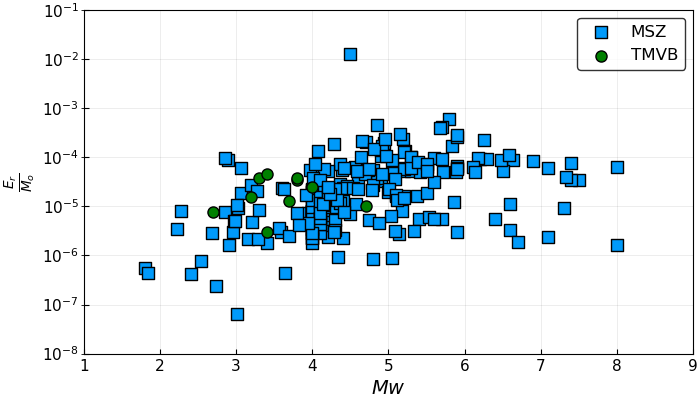

In [34]:
scatter((SUBErMo[:Mw]),(SUBErMo[:Er_Mo]),lab=sub1, m=(8,:rect))
scatter!((TMVErMo[:Mw]),(TMVErMo[:Er_Mo]),lab=TM,m=(8,:circle,:green),
    xlabel=L"$Mw$", ylabel=L"$\frac{E_{r}}{M_{o}}$",xlims=(1,9),xticks=(1:1:9),ylims=(10e-9,10e-2),size=(700,400),box=:True,
legendfont=Plots.font("Helvetica",12),
xtickfont=Plots.font("Helvetica",11),
ytickfont=Plots.font("Helvetica",11),
guidefont=Plots.font("Helvetica",14))
yaxis!(:log10)
#PyPlot.savefig("MwvsErMo.pdf",dpi=400)